# Regression Project

I have used [Avacado Prices dataset](https://www.kaggle.com/neuromusic/avocado-prices) from kaggle in this project.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('avocado.csv',index_col=0)
# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


There are 3 categorical features and luckily no missing value. Let's explore the data further.

In [3]:
data.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


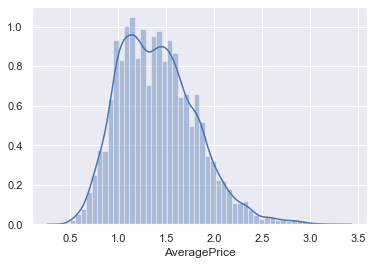

In [4]:
sns.distplot(data['AveragePrice']);

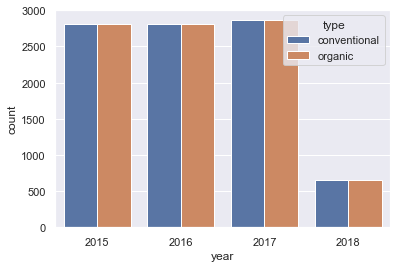

In [5]:
sns.countplot(x='year',data=data,hue='type');

There are almost equal numbers of conventional and organic avacados. Though, there is very less observations in the year 2018.

In [6]:
data.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

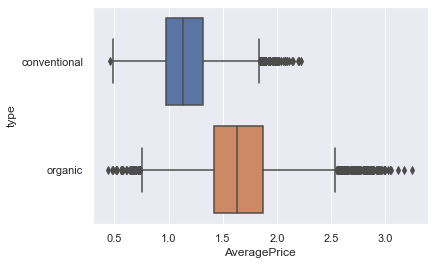

In [7]:
sns.boxplot(y="type", x="AveragePrice", data=data);

Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them.

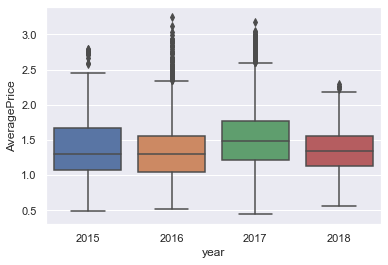

In [8]:
data.year=data.year.apply(str)
sns.boxplot(x="year", y="AveragePrice", data=data);

Avacados were slightly more expensive in the year 2017.(as there was shortage due to some reasons)

### Dealing with categorical features.

In [9]:
data['type']= data['type'].map({'conventional':0,'organic':1})

data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)

data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

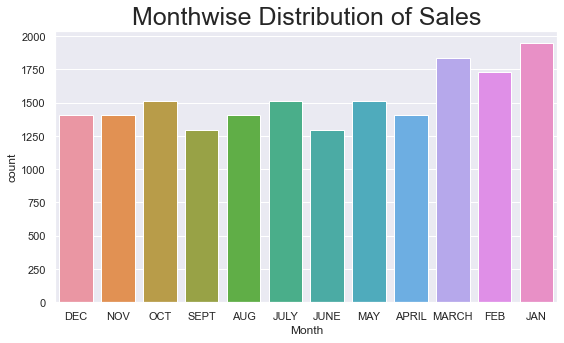

In [10]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

It implies that sales of avacado see a rise in January, Febuary and March.

## Preparing data for ML models

In [11]:
# Creating dummy variables

dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)

target = data['AveragePrice']

In [12]:
# Splitting data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

In [13]:
# Standardizing the data

cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

## Linear Regression

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [15]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
linear_pred = linear.predict(X_test)

## K-Nearest Neighbors

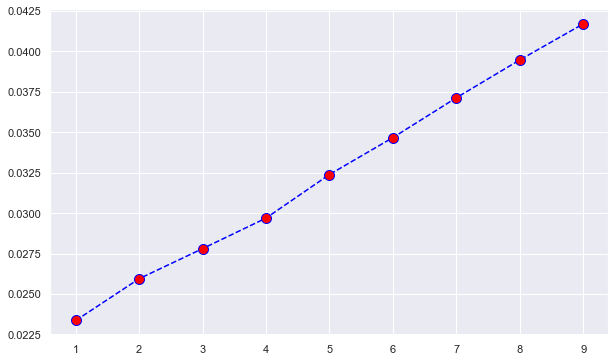

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

error_rate=[]
for i in range(1,10):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(mean_squared_error(y_test,pred_i))
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10);

## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg.fit(X_train,y_train)
rf_pred  = rfreg.predict(X_test)

## Support Vector Machine

In [19]:
from sklearn.svm import SVR
svm = SVR(gamma=1)
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

## Deep Neural Network

In [20]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
model = Sequential()

model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')

In [23]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [24]:
model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_val.values,y_val.values),
          batch_size=100,epochs=150,callbacks=[early_stop])

Train on 10219 samples, validate on 2555 samples
Epoch 1/150
10219/10219 [==============================] - 4s 404us/sample - loss: 0.2883 - val_loss: 0.0603
Epoch 2/150
10219/10219 [==============================] - 1s 102us/sample - loss: 0.1146 - val_loss: 0.0569
Epoch 3/150
10219/10219 [==============================] - 1s 87us/sample - loss: 0.0958 - val_loss: 0.0489
Epoch 4/150
10219/10219 [==============================] - 1s 86us/sample - loss: 0.0802 - val_loss: 0.0610
Epoch 5/150
10219/10219 [==============================] - 1s 86us/sample - loss: 0.0751 - val_loss: 0.0463
Epoch 6/150
10219/10219 [==============================] - 1s 88us/sample - loss: 0.0687 - val_loss: 0.0399
Epoch 7/150
10219/10219 [==============================] - 1s 88us/sample - loss: 0.0626 - val_loss: 0.0382
Epoch 8/150
10219/10219 [==============================] - 1s 88us/sample - loss: 0.0582 - val_loss: 0.0363
Epoch 9/150
10219/10219 [==============================] - 1s 87us/sample - loss: 0.0

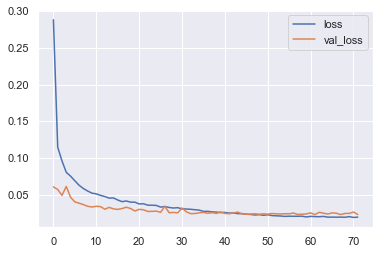

In [25]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [26]:
dnn_pred = model.predict(X_test)

## XGBoost

In [27]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

## Results table

In [49]:
methods = ['Linear Regression','K-Nearest Neighbors','Decision Tree',
           'Random Forest','Support Vector Machine','Deep Neural Network','XGBoost']
methods_pred = [linear_pred,knn_pred,dtree_pred,rf_pred,svm_pred,dnn_pred,xgb_pred]
results = pd.DataFrame(columns=['Mean Absolute error','Mean Squared Error'],index=methods)
for n,item in list(enumerate(methods_pred)):
    results.loc[methods[n]]=[mean_absolute_error(y_test,item).round(3),mean_squared_error(y_test,item).round(3)]
results['R-Squared'] = [linear.score(X_test,y_test),knn.score(X_test,y_test),dtree.score(X_test,y_test),
                        rfreg.score(X_test,y_test),svm.score(X_test,y_test),np.nan,xgb.score(X_test,y_test)]
results

,Mean Absolute error,Mean Squared Error,R-Squared
Linear Regression,0.18,0.057,0.647967
K-Nearest Neighbors,0.1,0.023,0.742827
Decision Tree,0.13,0.039,0.760040
Random Forest,0.095,0.019,0.884708
Support Vector Machine,0.117,0.028,0.829491
Deep Neural Network,0.111,0.025,NaN
XGBoost,0.097,0.018,0.888539


In [50]:
0.1 * data.AveragePrice.mean()

0.14059784097758782

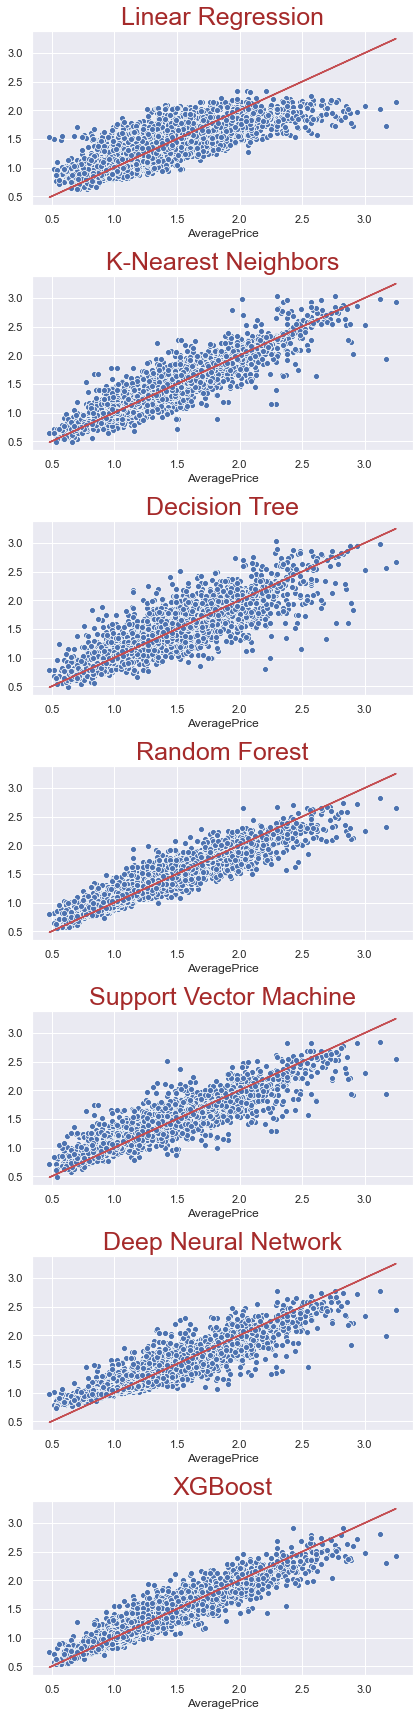

In [53]:
fig,axes=plt.subplots(7,1,figsize=(6,24))
for n in range(5):
    sns.scatterplot(y_test,methods_pred[n],ax=axes[n])
    axes[n].plot(y_test,y_test,c='r')
    axes[n].set_title(methods[n],fontdict={'fontsize':25,'color':'brown'})
sns.scatterplot(y_test,dnn_pred.reshape(1,5475)[0],ax=axes[5])
axes[5].plot(y_test,y_test,c='r')
axes[5].set_title(methods[5],fontdict={'fontsize':25,'color':'brown'})
sns.scatterplot(y_test,xgb_pred,ax=axes[6])
axes[6].plot(y_test,y_test,c='r')
axes[6].set_title(methods[6],fontdict={'fontsize':25,'color':'brown'})
plt.tight_layout()

## Conclusion:

* Except linear regression model, all other models have mean absolute error less than 10% of mean of target variable.
* For this dataset, Random Forest algorithm and XGBoost has shown best results.